# TensorFlow Profiler: Profile model performance

## 1. Overview

## 2. Setup

In [1]:
from datetime import datetime
from packaging import version
import os

# The TensorFlow Profiler requires the latest versions of TensorFlow and TensorBoard (>=2.2).
# pip install -U tensorboard_plugin_profile

import tensorflow as tf
print("TensorFlow version: ", tf.__version__)

TensorFlow version:  2.4.1


In [2]:
# Confirm that TensorFlow can access the GPU.

device_name = tf.test.gpu_device_name()
if not device_name:
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


## 3. Train an image classification model with TensorBoard callbacks

In [3]:
import tensorflow_datasets as tfds
tfds.disable_progress_bar()

In [4]:
(ds_train, ds_test), ds_info = tfds.load(
    'mnist',
    split=['train', 'test'],
    shuffle_files=True,
    as_supervised=True,
    with_info=True,
)

In [5]:
# Preprocess the training and test data by normalizing pixel values to be between 0 and 1.

def normalize_img(image, label):
  """Normalizes images: `uint8` -> `float32`."""
  return tf.cast(image, tf.float32) / 255., label

ds_train = ds_train.map(normalize_img)
ds_train = ds_train.batch(128)

In [6]:
ds_test = ds_test.map(normalize_img)
ds_test = ds_test.batch(128)

In [7]:
# Create the image classification model using Keras.

model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28, 1)),
  tf.keras.layers.Dense(128,activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])
model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=tf.keras.optimizers.Adam(0.001),
    metrics=['accuracy']
)

In [16]:
# Create a TensorBoard callback to capture performance profiles and call it while training the model.

# Create a TensorBoard callback
logs = "logs/" + datetime.now().strftime("%Y%m%d-%H%M%S")

tboard_callback = tf.keras.callbacks.TensorBoard(log_dir = logs,
                                                 histogram_freq = 1,
                                                 profile_batch = '500,520')

model.fit(ds_train,
          epochs=10,
          validation_data=ds_test,
          callbacks = [tboard_callback])

Epoch 1/10
469/469 [==============================] - 1s 2ms/step - loss: 7.3513e-04 - accuracy: 1.0000 - val_loss: 0.0962 - val_accuracy: 0.9783
Epoch 2/10
469/469 [==============================] - 1s 2ms/step - loss: 5.9932e-04 - accuracy: 1.0000 - val_loss: 0.0985 - val_accuracy: 0.9787
Epoch 3/10
469/469 [==============================] - 1s 2ms/step - loss: 4.9055e-04 - accuracy: 1.0000 - val_loss: 0.0997 - val_accuracy: 0.9783
Epoch 4/10
469/469 [==============================] - 1s 2ms/step - loss: 4.0333e-04 - accuracy: 1.0000 - val_loss: 0.1008 - val_accuracy: 0.9785
Epoch 5/10
469/469 [==============================] - 1s 2ms/step - loss: 3.3701e-04 - accuracy: 1.0000 - val_loss: 0.1022 - val_accuracy: 0.9782
Epoch 6/10
469/469 [==============================] - 1s 2ms/step - loss: 2.8052e-04 - accuracy: 1.0000 - val_loss: 0.1038 - val_accuracy: 0.9783
Epoch 7/10
469/469 [==============================] - 1s 2ms/step - loss: 2.3584e-04 - accuracy: 1.0000 - val_loss: 0.1055 -

## 4. Use the TensorFlow Profiler to profile model training performance

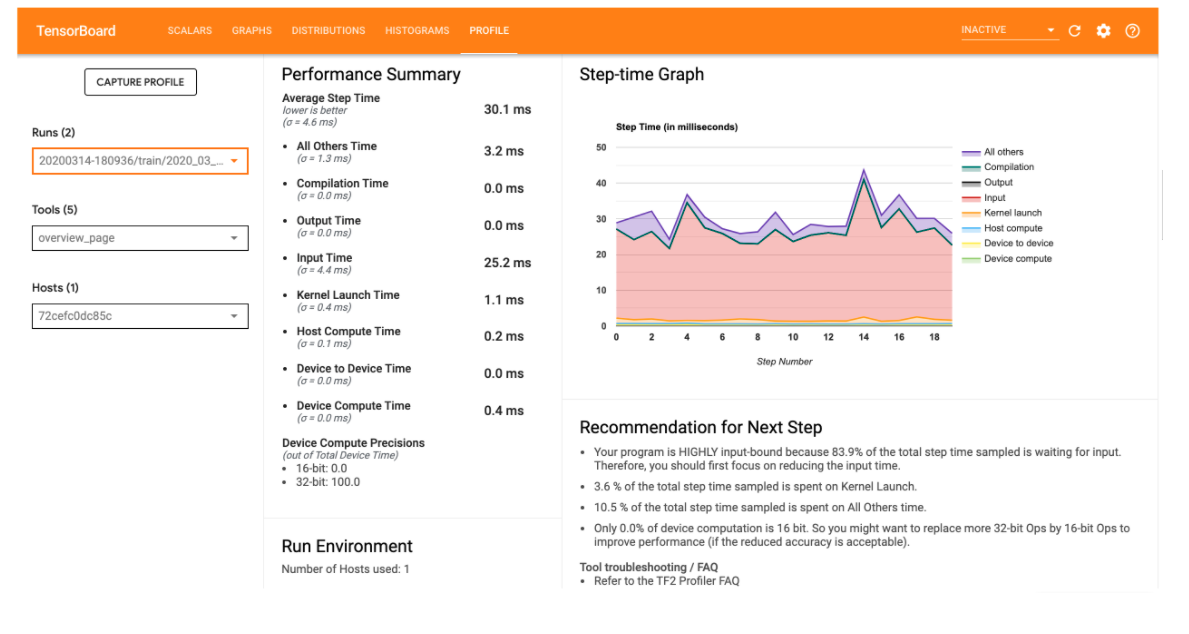

In [10]:
from IPython.display import Image,display
display(Image(filename="./image/profiler.png", embed=True))

## 5. Debug performance bottlenecks

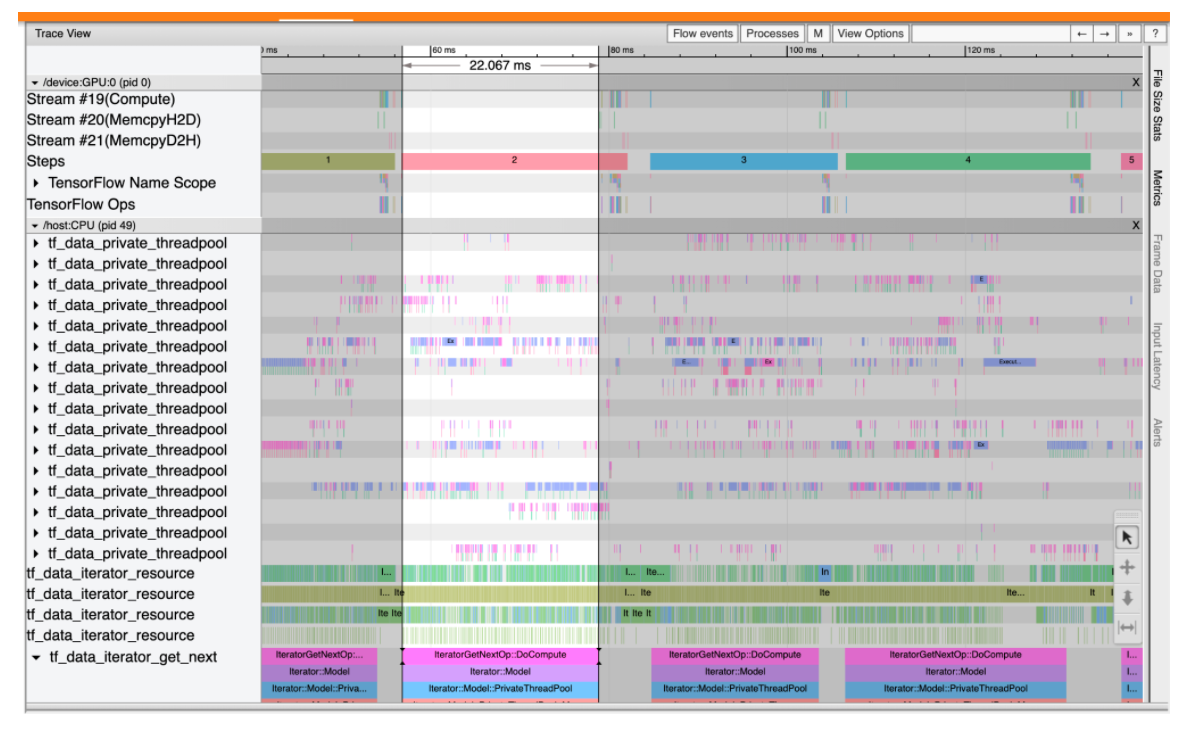

In [11]:
from IPython.display import Image,display
display(Image(filename="./image/profiler3.png", embed=True))

In [12]:
(ds_train, ds_test), ds_info = tfds.load(
    'mnist',
    split=['train', 'test'],
    shuffle_files=True,
    as_supervised=True,
    with_info=True,
)

In [13]:
ds_train = ds_train.map(normalize_img)
ds_train = ds_train.batch(128)
ds_train = ds_train.cache()
ds_train = ds_train.prefetch(tf.data.experimental.AUTOTUNE)

In [14]:
ds_test = ds_test.map(normalize_img)
ds_test = ds_test.batch(128)
ds_test = ds_test.cache()
ds_test = ds_test.prefetch(tf.data.experimental.AUTOTUNE)

In [15]:
# Train the model again and capture the performance profile by reusing the callback from before.

model.fit(ds_train,
          epochs=10,
          validation_data=ds_test,
          callbacks = [tboard_callback])

Epoch 1/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0047 - accuracy: 0.9998 - val_loss: 0.0899 - val_accuracy: 0.9770
Epoch 2/10
469/469 [==============================] - 1s 2ms/step - loss: 0.0038 - accuracy: 0.9998 - val_loss: 0.0907 - val_accuracy: 0.9772
Epoch 3/10
469/469 [==============================] - 1s 2ms/step - loss: 0.0041 - accuracy: 0.9996 - val_loss: 0.0998 - val_accuracy: 0.9767
Epoch 4/10
469/469 [==============================] - 1s 2ms/step - loss: 0.0070 - accuracy: 0.9982 - val_loss: 0.0981 - val_accuracy: 0.9772
Epoch 5/10
469/469 [==============================] - 1s 2ms/step - loss: 0.0042 - accuracy: 0.9992 - val_loss: 0.1191 - val_accuracy: 0.9732
Epoch 6/10
469/469 [==============================] - 1s 2ms/step - loss: 0.0038 - accuracy: 0.9994 - val_loss: 0.0945 - val_accuracy: 0.9768
Epoch 7/10
469/469 [==============================] - 1s 2ms/step - loss: 0.0023 - accuracy: 0.9998 - val_loss: 0.0978 - val_accuracy: 0.9782
Epoch 

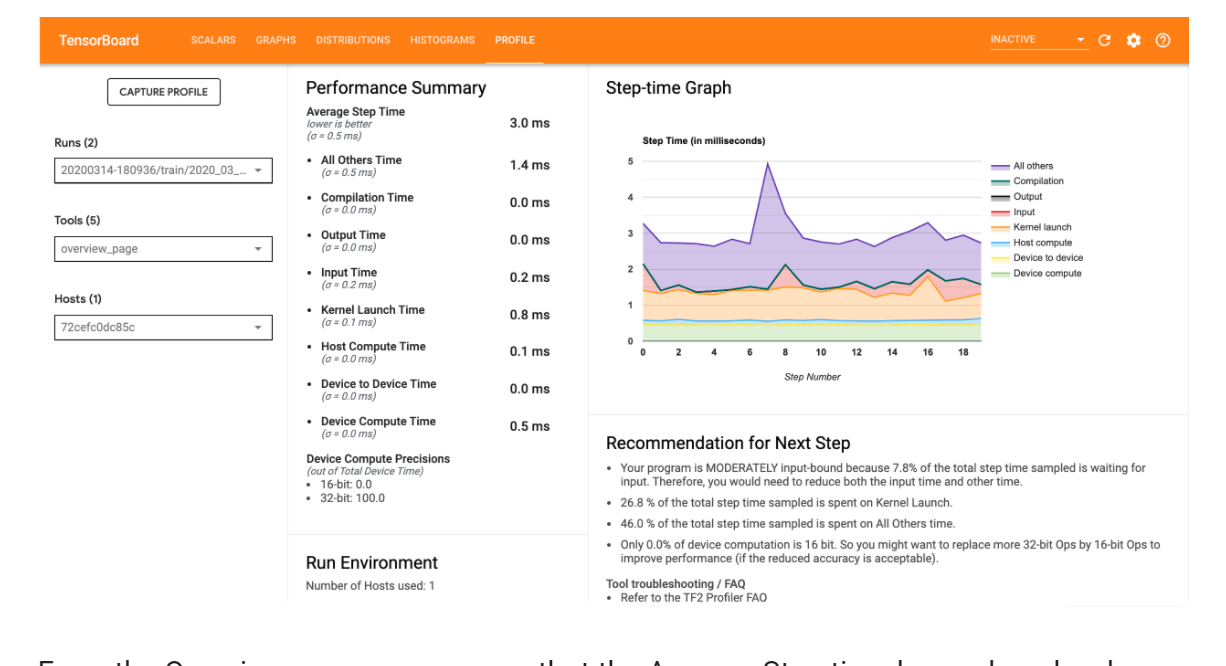

In [17]:
from IPython.display import Image,display
display(Image(filename="./image/profiler4.png", embed=True))

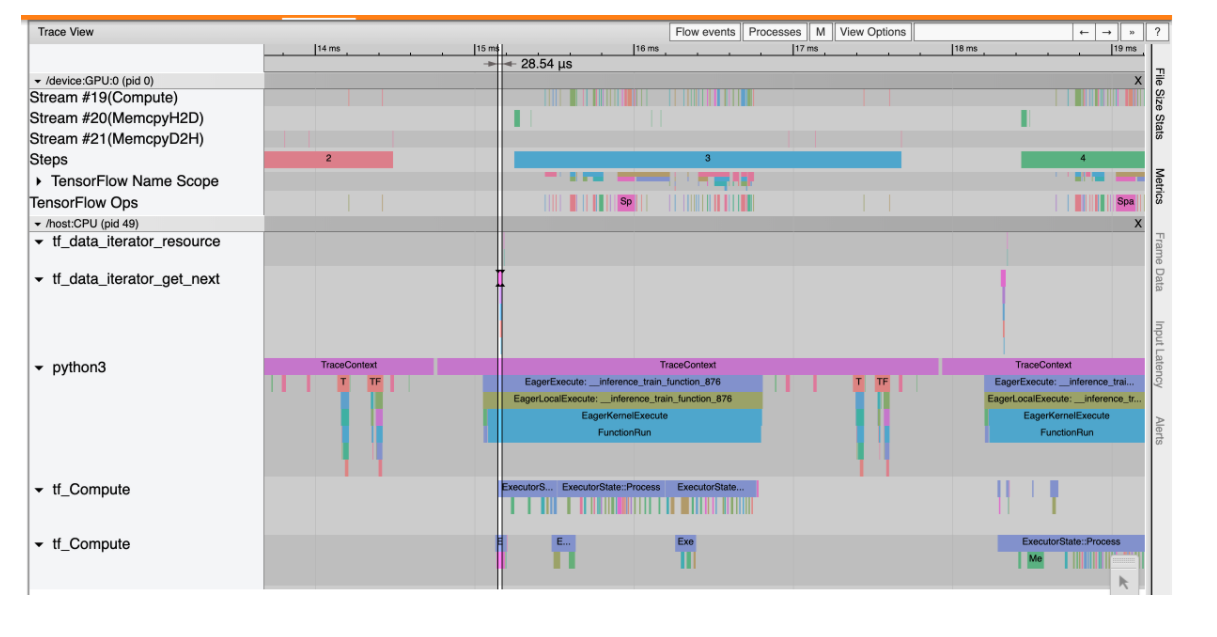

In [18]:
from IPython.display import Image,display
display(Image(filename="./image/profiler5.png", embed=True))

## 6. Summary

# reference

### https://tensorflow.google.cn/tensorboard/tensorboard_profiling_keras#summary

--------------------------------------

# Using TensorBoard in Notebooks

# reference

### https://tensorflow.google.cn/tensorboard/tensorboard_in_notebooks

-----------------------------------------

# Accessing TensorBoard Data as DataFrames

# reference

### https://tensorflow.google.cn/tensorboard/dataframe_api

---------------------------------------

# Debugging Numerical Issues in TensorFlow Programs Using TensorBoard Debugger V2

# reference

### https://tensorflow.google.cn/tensorboard/debugger_v2